In [1]:
# pip install sklearn

In [2]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [4]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [6]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [7]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
predictions[0:5]

array([171.19646471, 260.96022103, 180.08726412, 172.55465533,
       108.07328943])

Text(0, 0.5, 'Predictions')

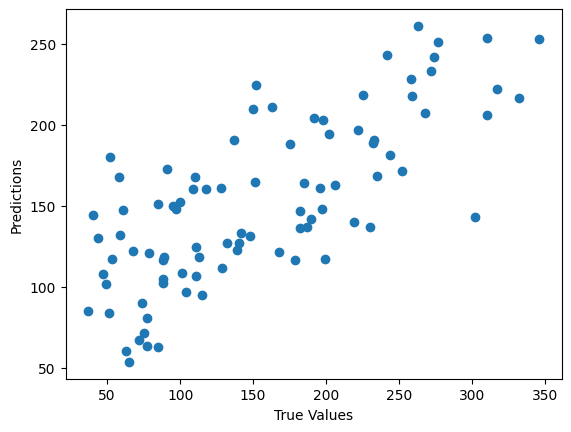

In [9]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [10]:
import numpy as np

In [11]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 54.78594937739145
Train RMSE: 53.39437710153635


# Cross Validation

In [12]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [13]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [14]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [15]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [17]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

ValueError: Found input variables with inconsistent numbers of samples: [442, 4]

In [18]:
cross_val_predict(model, df, y, cv=10)

ValueError: Found input variables with inconsistent numbers of samples: [442, 4]

In [19]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [442, 4]

In [20]:
predictions

array([171.19646471, 260.96022103, 180.08726412, 172.55465533,
       108.07328943, 116.90438389, 163.93196219, 121.83418141,
       117.29676385, 168.02450697,  63.51049451, 160.74899608,
       127.14085557, 228.16157891, 106.90355634, 105.04317267,
       131.20641631,  97.02656901, 101.59922385, 142.85294738,
       188.34203285, 190.86371255, 146.97676587, 108.26252403,
       160.49246584, 217.80409468, 140.21812776, 116.39181718,
        53.59362133, 136.62200384, 160.1830697 , 216.46590787,
        83.64288669, 147.66591416, 122.74622321, 218.31927493,
       152.55348646, 120.89750176, 147.68751657, 150.79629459,
       253.47388367,  95.115065  , 130.38232341, 190.53199936,
       209.38949263,  60.41800584, 233.38274312, 206.15292787,
       252.9892358 , 221.79964435, 150.04991731, 181.17080302,
       210.93510066, 118.24130731, 163.06740041, 203.1834736 ,
       196.97355936, 188.80324683, 135.96808134, 241.95075989,
       131.73831808, 116.37464633, 118.45052309,  67.18

In [21]:
np.sqrt(mean_squared_error(y,predictions))

ValueError: Found input variables with inconsistent numbers of samples: [4, 89]

# Feature Scaling

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [28]:
y = data['Value']

In [29]:
#data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [30]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Value'], axis = 1)

In [31]:
data.head()

,Age,Overall,Potential,Jersey Number,Contract Valid Until
0,31,94,94,10.0,2021
1,33,94,94,7.0,2022
2,26,92,93,10.0,2022
3,27,91,93,1.0,2020
4,27,91,92,7.0,2023


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [76]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [77]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.068966,0.166667,0.468085,0.367347
1,0.551724,0.375000,0.340426,0.051020
2,0.310345,0.625000,0.659574,0.142857
3,0.448276,0.666667,0.638298,0.081633
4,0.310345,0.354167,0.340426,0.081633
...,...,...,...,...
14320,0.379310,0.562500,0.531915,0.775510
14321,0.310345,0.354167,0.404255,0.112245
14322,0.482759,0.375000,0.340426,0.316327
14323,0.482759,0.416667,0.382979,0.255102


In [78]:
df2 =pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

### Standard Scaler

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [88]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-1.527592,-1.766280,-0.218318,1.063786
1,1.481617,-0.325025,-1.194514,-0.846818
2,-0.022987,1.404482,1.245976,-0.292127
3,0.836787,1.692733,1.083276,-0.661921
4,-0.022987,-0.469150,-1.194514,-0.661921
...,...,...,...,...
14320,0.406900,0.972105,0.269780,3.529081
14321,-0.022987,-0.469150,-0.706416,-0.477024
14322,1.051730,-0.325025,-1.194514,0.755624
14323,1.051730,-0.036773,-0.869115,0.385829


In [89]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-1.742535,-1.333903,0.107081,1.063786
1,-0.022987,-0.180899,-0.218318,-1.154980
2,0.836787,1.260357,0.595178,-0.661921
3,0.836787,0.251478,-0.381017,0.693991
4,0.191956,-0.757401,-1.194514,0.385829
...,...,...,...,...
3577,-0.452874,-0.036773,-0.055619,0.077668
3578,-0.237931,0.395603,0.595178,0.632359
3579,-0.452874,-0.469150,-0.381017,-0.415391
3580,-1.312648,-1.333903,0.757878,0.447462


# tasks

###### try applying this scalers to any dataset and check the regression results

In [ ]:
# your code here

# One Hot Encoding

In [67]:
data = pd.read_csv('regression.csv')

In [68]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [69]:
pd.get_dummies(data[['Age', 'Club']])

,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying OHE to any column(s) and check the regression results

In [ ]:
# your code here